# SciPy Python Library
## Scientific algorithms for Python

Content
1. Special Funtions
2. Integrations
3. Optimizations
4. Interpolation
5. Fourier Transformation
6. Signal Processing
7. Sparse Eigenvalue Problems
8. Statistics
9. Multi-dimensional image processing
10. File IO


In [53]:
# Importing scipy python library
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

### Special Functions

In [20]:
'''The SciPy includes a number of Bessel functions
jn and yn are Bessel functions of the first kind and second kind respectively.
And also jn_zeros and yn_zeros give the zeros of the Bessel functions jn and yn. 
'''

from scipy.special import jn, yn, jn_zeros ,yn_zeros

In [5]:
n = 0 # order
x = 0.0

# Bessel function of first kind
print("J_%d(%f) = %f" % (n,x,jn(n,x)))

x = 1.0
# Bessel function of second kind
print("J_%d(%f) = %f" % (n,x,yn(n,x)))


J_0(0.000000) = 1.000000
J_0(1.000000) = 0.088257


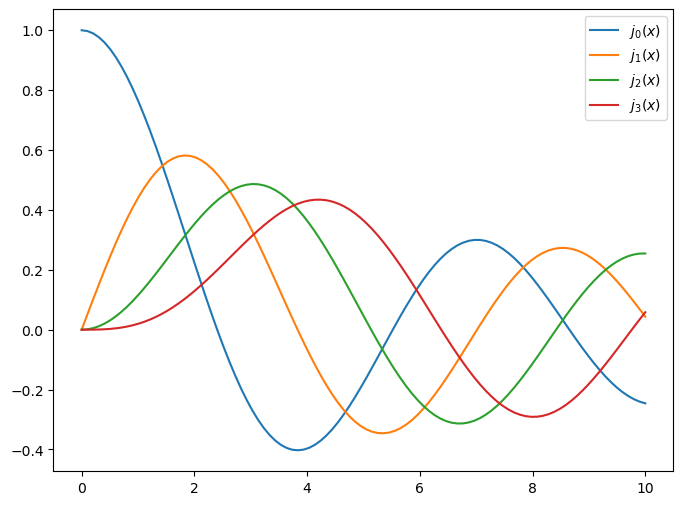

In [15]:
x = np.linspace(0,10,100)

fig, ax = plt.subplots(figsize=(8,6))
for n in range(4):
    ax.plot(x,jn(n,x), label=r"$j_%d(x)$" %n)
ax.legend()

In [22]:
# Zeros of Bessel functions 
n = 0 # order 
m = 4 # number of roots to compute
jn_zeros(n,m)

array([ 2.40482556,  5.52007811,  8.65372791, 11.79153444])

### Integration
Numerical Integration: quadrature

Numerical evaluation of a function of the type \
$\int_a^b f(x)\, dx$ \
is called quadrature. SciPy provides quad , dblquad and tplquad for single, double and triple integral respectively.


In [25]:
from scipy.integrate import quad, dblquad, tplquad

In [26]:
help(quad)

Help on function quad in module scipy.integrate._quadpack_py:

quad(func, a, b, args=(), full_output=0, epsabs=1.49e-08, epsrel=1.49e-08, limit=50, points=None, weight=None, wvar=None, wopts=None, maxp1=50, limlst=50, complex_func=False)
    Compute a definite integral.

    Integrate func from `a` to `b` (possibly infinite interval) using a
    technique from the Fortran library QUADPACK.

    Parameters
    ----------
    func : {function, scipy.LowLevelCallable}
        A Python function or method to integrate. If `func` takes many
        arguments, it is integrated along the axis corresponding to the
        first argument.

        If the user desires improved integration performance, then `f` may
        be a `scipy.LowLevelCallable` with one of the signatures::

            double func(double x)
            double func(double x, void *user_data)
            double func(int n, double *xx)
            double func(int n, double *xx, void *user_data)

        The ``user_data`` is t

In [27]:
# define the function
def f(x):
    return x

In [31]:
x_lower = 0 # the lower limit of the integration
x_upper = 1 # the upper limit of the integration

val , abserr = quad(f,x_lower, x_upper)
print("integral Value: ", val ,"Absolute error: ",abserr)

integral Value:  0.5 Absolute error:  5.551115123125783e-15


If we need to passs extra arguments to integrand function we can use args keyword argument

In [36]:
def integrand(x,n):
    """
    Bessel function of the first kind  and order n
    """
    return jn(n,x)

x_lower = 0
x_upper = 10

val , abserr = quad(integrand, x_lower, x_upper, args=(3,))
print(val, abserr)


0.736675137081107 9.389224378461894e-13


For simple fucntions we could use lambda function instead of explicitly defining a function for the integrand.

In [51]:
val , abserr = quad(lambda x : np.exp(-x**2), -np.inf, np.inf)

print('Numerrical value:', val)

analytical_value = np.sqrt(np.pi)
print("Analytical Value", analytical_value)

Numerrical value: 1.7724538509055159
Analytical Value 1.7724538509055159


### Ordinary Differential Equations (ODEs)

SciPy privides two differen ways to solve ODEs:
1. odeint - An API based on the function
2. ode - Object-oriented API based function

In [52]:
from scipy.integrate import odeint, ode

In [54]:
Image(url='http://upload.wikimedia.org/wikipedia/commons/c/c9/Double-compound-pendulum-dimensioned.svg')

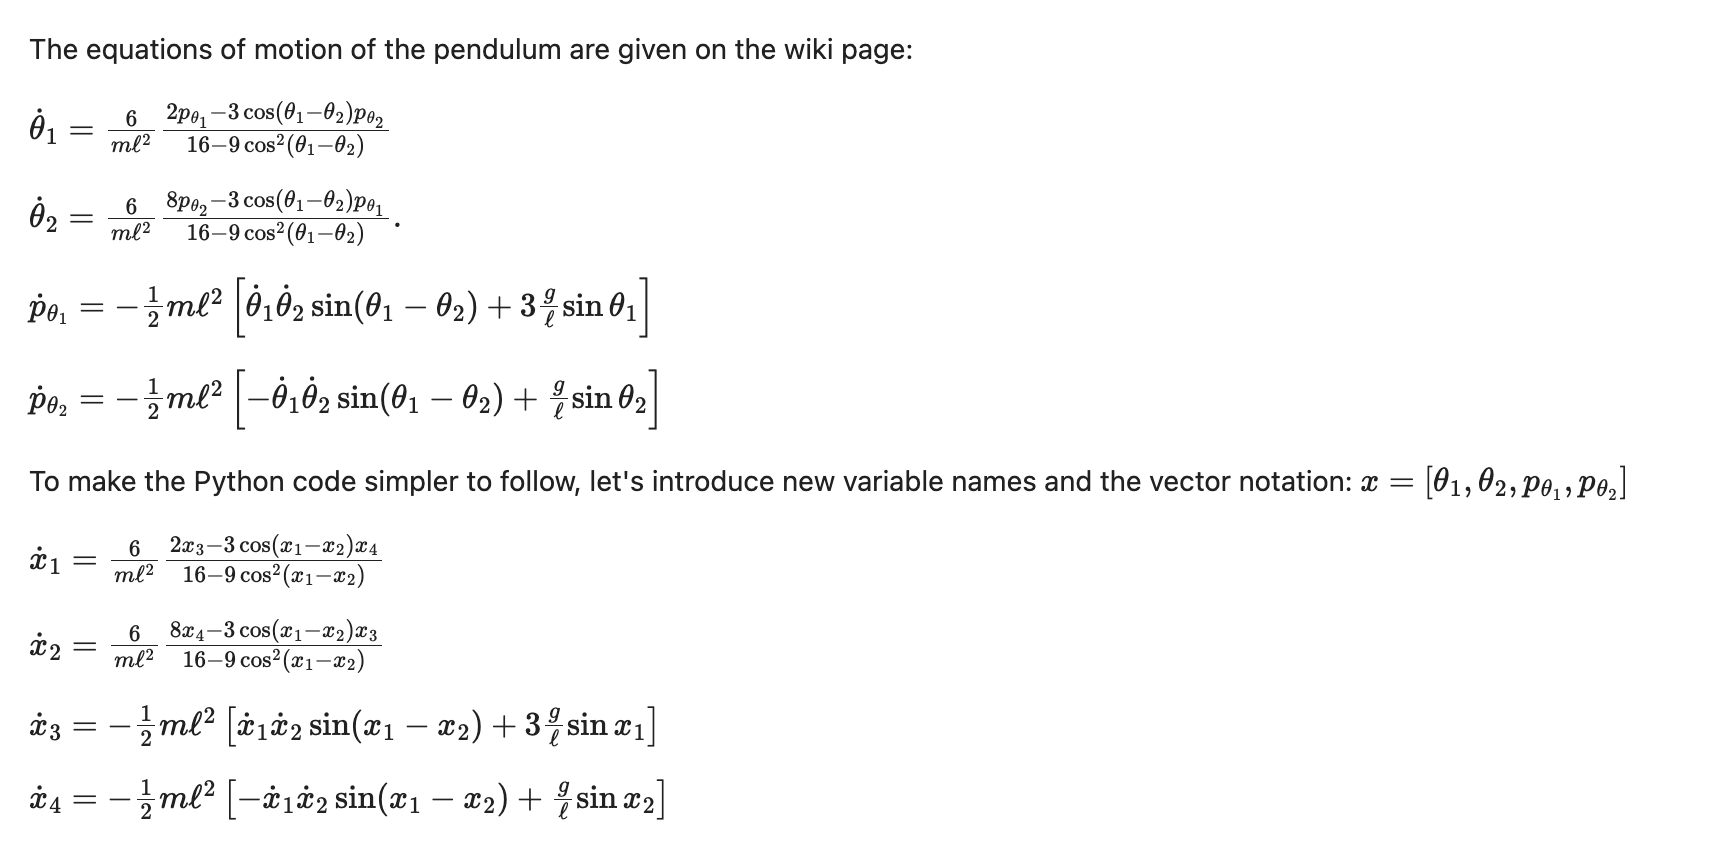

In [78]:
g = 9.82
L = 0.5
m = 0.1

def dx(x,t):
    """
    The right-hand side of the pendulum ODE
    """
    x1, x2, x3, x4 = x[0], x[1], x[2], x[3]

    dx1 = 6.0/(m*L**2) * ((2*x3-3*np.cos(x1-x2)*x4)/(16-9*np.cos(x1-x2)**2))
    dx2 = 6.0/(m*L**2) * ((8*x4-3*np.cos(x1-x2)*x3)/(16-9*np.cos(x1-x2)**2))
    dx3 = -0.5*(m*L**2) * (dx1*dx2*np.sin(x1-x2)+3*(g/L)*np.sin(x1))
    dx4 = -0.5*(m*L**2) * (-dx1*dx2*np.sin(x1-x2)+(g/L)*np.sin(x2))

    return [dx1, dx2, dx3, dx4]

In [79]:
# Choose Initial conditions
x0 = [np.pi/4, np.pi/2, 0, 0]

In [80]:
# Time coordinate to solve the ODE
t = np.linspace(0,10 ,250)

In [81]:
# Solve the ODE problem
x = odeint(dx, x0, t)

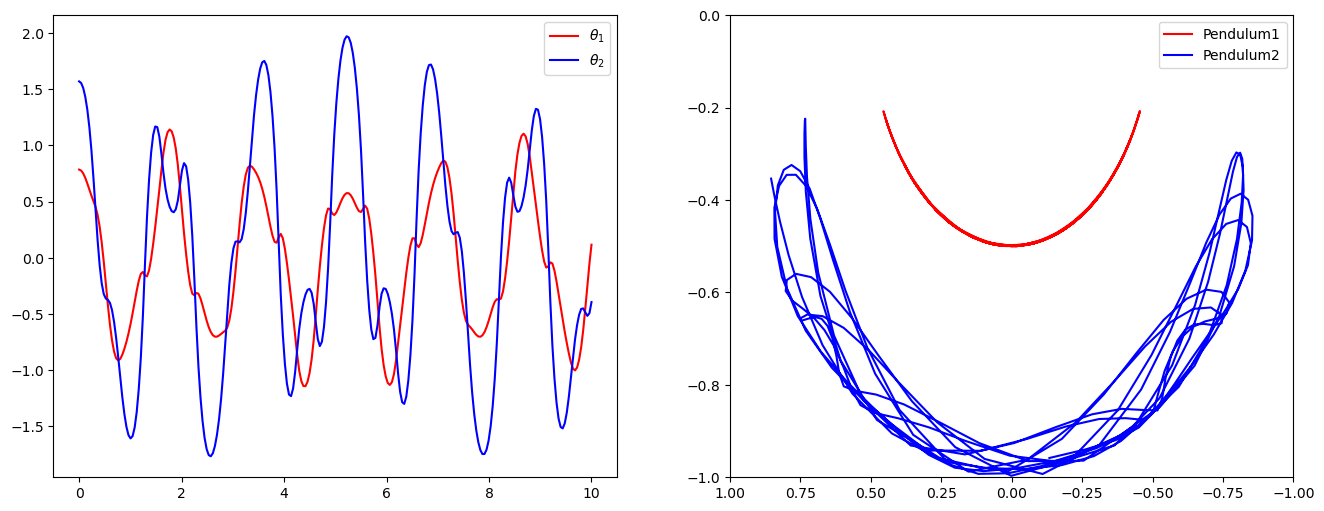

In [84]:
# Plot the anlges as a function of time

fig, axes = plt.subplots(1,2 , figsize=(16,6))
axes[0].plot(t,x[:,0],'r',label=r"$\theta_1$")
axes[0].plot(t,x[:,1],'b',label=r"$\theta_2$")
axes[0].legend()

x1 = + L * np.sin(x[:, 0])
y1 = - L * np.cos(x[:, 0])

x2 = x1 + L * np.sin(x[:, 1])
y2 = y1 - L * np.cos(x[:, 1])

axes[1].plot(x1,y1, 'r',label ="Pendulum1")
axes[1].plot(x2,y2, 'b',label ="Pendulum2")
axes[1].set_ylim([-1, 0])
axes[1].set_xlim([1, -1])
axes[1].legend()

In [86]:
from IPython.display import display, clear_output
import time

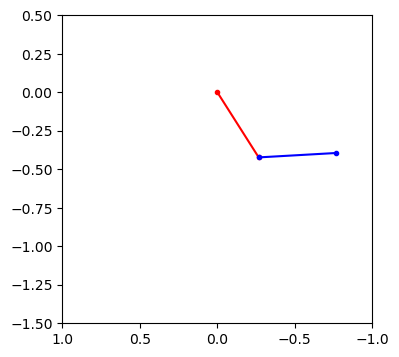

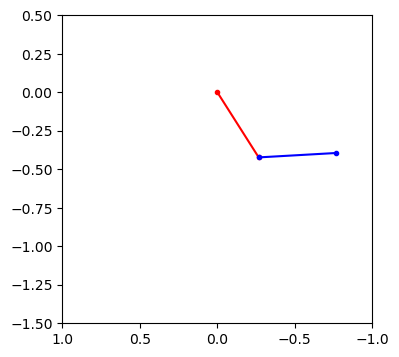

In [93]:
fig , ax = plt.subplots(figsize=(4,4))
for t_idx , tt in enumerate(t[:200]):
    x1 = + L * np.sin(x[t_idx, 0])
    y1 = - L * np.cos(x[t_idx, 0])

    x2 = x1 + L * np.sin(x[t_idx, 1])
    y2 = y1 - L * np.cos(x[t_idx, 1])

    ax.cla()
    ax.plot([0,x1],[0,y1], 'r.-')
    ax.plot([x1,x2],[y1,y2],'b.-')
    ax.set_ylim([-1.5, 0.5])
    ax.set_xlim([1, -1])

    clear_output() 
    display(fig)

    time.sleep(1)

#### Example: Damped harmonic oscillator

$\frac{d^2x}{dt^2} +2\zeta\omega_0\frac{dx}{dt} + \omega_0^2x = 0$ \
Introducing $p = \frac{dx}{dt}$\
We could write the differential equation as follows
$\frac{dp}{dt}=-2\zeta\omega_0p-\omega_0^2x$


In the implementation of this example we will add extra arguments to the RHS function for the ODE, rather than using global variables as we did in the previous example. As a consequence of the extra arguments to the RHS, we need to pass an keyword argument args to the odeint function:

In [96]:
def dy (y,t, zeta, omega0):
    """
    The right-hand side of the damped oscillator ODE
    """
    x, p = y[0], y[1]

    dx = p
    dp = -2*zeta*omega0*p-omega0**2*x

    return [dx, dp]

In [97]:
# Initial State
y0 = [1.0,0]

In [98]:
# time coordinate to solve the ODE
t = np.linspace(0,10,1000)
omega0 = 2*np.pi*1.0

In [99]:
# solve the ODE problem for three different values of the damping ratio

y1 = odeint(dy, y0, t, args=(0.0, omega0)) # undamped
y2 = odeint(dy, y0, t, args=(0.2, omega0)) # under damped
y3 = odeint(dy, y0, t, args=(1.0, omega0)) # critical damping
y4 = odeint(dy, y0, t, args=(5.0, omega0)) # over damped

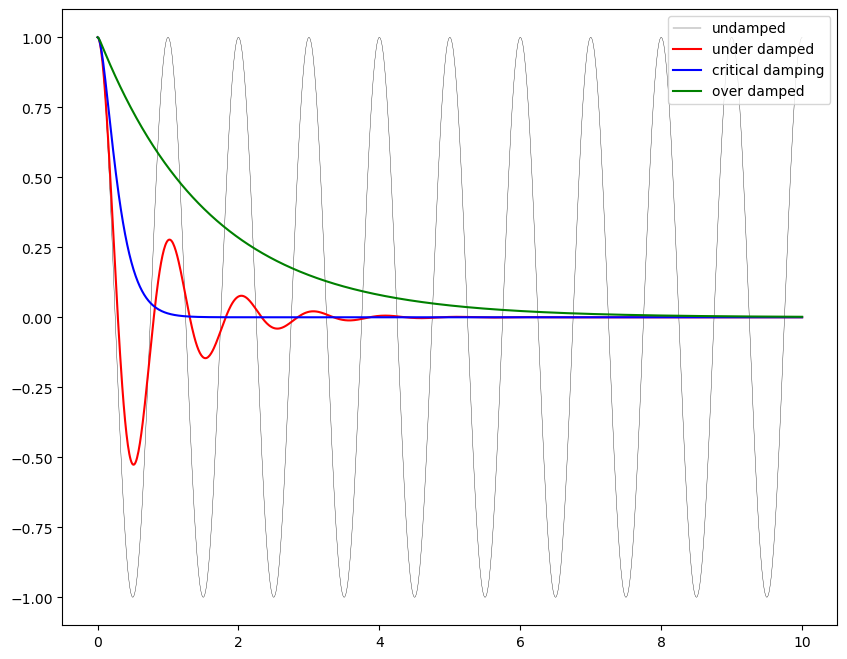

In [101]:
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(t, y1[:,0], 'k', label="undamped", linewidth=0.25)
ax.plot(t, y2[:,0], 'r', label="under damped")
ax.plot(t, y3[:,0], 'b', label=r"critical damping")
ax.plot(t, y4[:,0], 'g', label="over damped")
ax.legend();

### Fourier Transform

In [102]:
from numpy.fft import fftfreq
from scipy.fftpack import *

In [104]:
N = len(t)
dt = t[1]-t[0]

# calculate the fast fourier transform
# y2 is the solution to the under-damped oscillator from the previous section
F = fft(y2[:,0]) 

# calculate the frequencies for the components in F
w = fftfreq(N, dt)

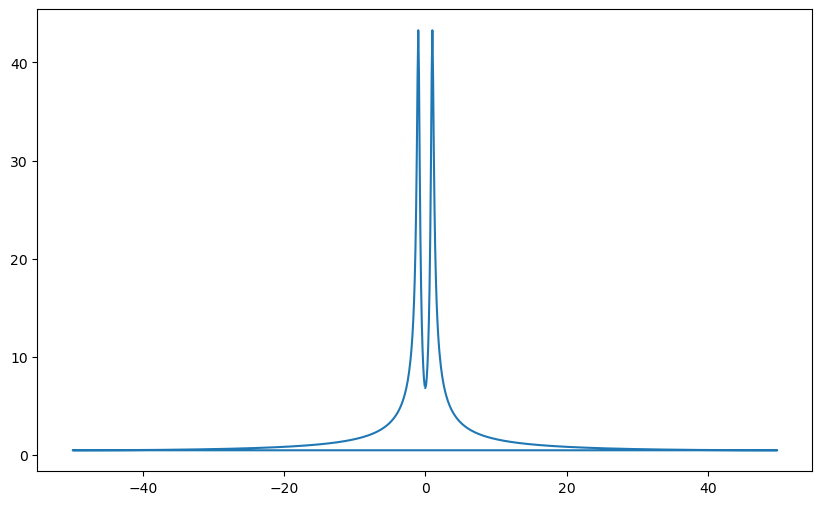

In [108]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(w, abs(F))

In [112]:
indices = np.where(w>0)
w_pos = w[indices]
F_pos = F[indices]

(0.0, 5.0)

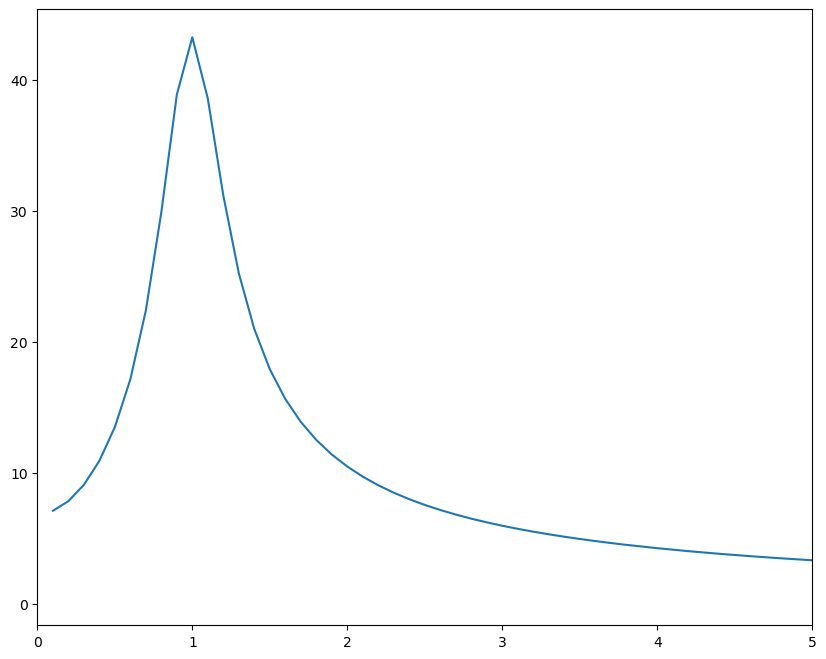

In [116]:
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(w_pos,np.abs(F_pos))
ax.set_xlim(0,5)

### Linear Algebra

In [119]:
from scipy.linalg import *

Consider linear equation system in the form of,
$Ax = b$

In [125]:
A = np.array([[1,2,3],[4,5,6],[7,8,9]])
print(np.shape(A))
b = np.array([1,2,3])
print(np.shape(b))

(3, 3)
(3,)


In [127]:
x = solve(A,b)
x

/var/folders/dx/xwlgf8b916qc_jnxddxk1w380000gn/T/ipykernel_10893/903111112.py:1: LinAlgWarning: Ill-conditioned matrix (rcond=2.20282e-18): result may not be accurate.
  x = solve(A,b)


array([-0.23333333,  0.46666667,  0.1       ])

In [128]:
# Check
np.dot(A,x)-b

array([0., 0., 0.])

Now consider the equation $AX=B$ where B is also a matrix

In [130]:
A = np.random.rand(3,3)
B = np.random.rand(3,3)

A,B

(array([[0.09418019, 0.09160016, 0.40810291],
        [0.36143872, 0.89443302, 0.48090655],
        [0.29847524, 0.63941109, 0.93616262]]),
 array([[0.4007069 , 0.41527011, 0.89644421],
        [0.80155791, 0.73899805, 0.0949369 ],
        [0.80140168, 0.68679439, 0.06417637]]))

In [136]:
X = solve (A,B)
print(X)

# check
norm(np.dot(A,X)-B)

[[ 5.48277939e+00  7.40821539e+00  2.70377274e+01]
 [-1.32720373e+00 -2.04171900e+00 -9.83255321e+00]
 [ 1.44810019e-02 -2.33802003e-01 -1.83608297e+00]]


np.float64(1.7254282100492589e-15)

Solving for eigenvalues and eigenvectors

In [138]:
evals = eigvals(A)
evals

array([1.58676106+0.j, 0.03639891+0.j, 0.30161587+0.j])

In [140]:
evals, evecs = eig (A)
evals, evecs

(array([1.58676106+0.j, 0.03639891+0.j, 0.30161587+0.j]),
 array([[-0.23973369, -0.9301453 ,  0.56046081],
        [-0.63516712,  0.36376516, -0.7003275 ],
        [-0.73422782,  0.05004632,  0.44206908]]))

#### Matrix Operations

In [141]:
inv(A)

array([[ 30.41507321,  10.05686005, -18.42509994],
       [-11.18393048,  -1.93112394,   5.86744721],
       [ -2.0584213 ,  -1.88743024,   2.935094  ]])

In [142]:
det(A)

np.float64(0.017420236979904698)

#### Sparse Matrices

In [143]:
from scipy.sparse import *

In [145]:
# dense matrix
M = np.array ([[1,0,0,0],[0,3,0,0],[0,1,1,0],[1,0,0,1]])
M

array([[1, 0, 0, 0],
       [0, 3, 0, 0],
       [0, 1, 1, 0],
       [1, 0, 0, 1]])

In [147]:
# convert from dense to sparse
A = csr_matrix(M)
A

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 6 stored elements and shape (4, 4)>

In [148]:
# convert from sparse to dense
A.todense()

matrix([[1, 0, 0, 0],
        [0, 3, 0, 0],
        [0, 1, 1, 0],
        [1, 0, 0, 1]])

More efficient way to create sparse matrices: create an empty matrix and populate with using matrix indexing 

In [152]:
A = lil_matrix((4,4)) # empty 4x4 sparse matrix
A[0,0] = 1
A[1,1] = 3
A[2,1] = A[2,2] = 1
A[3,0] =A[3,3] = 1
A, A.todense()

(<List of Lists sparse matrix of dtype 'float64'
 	with 6 stored elements and shape (4, 4)>,
 matrix([[1., 0., 0., 0.],
         [0., 3., 0., 0.],
         [0., 1., 1., 0.],
         [1., 0., 0., 1.]]))

In [153]:
A

<List of Lists sparse matrix of dtype 'float64'
	with 6 stored elements and shape (4, 4)>

In [155]:
A = csr_matrix(A)
A

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 6 stored elements and shape (4, 4)>

In [157]:
A = csc_matrix(A)
A

<Compressed Sparse Column sparse matrix of dtype 'float64'
	with 6 stored elements and shape (4, 4)>

In [158]:
A.todense()

matrix([[1., 0., 0., 0.],
        [0., 3., 0., 0.],
        [0., 1., 1., 0.],
        [1., 0., 0., 1.]])

In [159]:
(A*A).todense()

matrix([[1., 0., 0., 0.],
        [0., 9., 0., 0.],
        [0., 4., 1., 0.],
        [2., 0., 0., 1.]])